In [ ]:
#importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string, os
import nltk
import re
import keras
import random
import io
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Embedding
from keras.optimizers import Adamax
import sys
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/lyrics.csv")
data

,Title,Lyrics
0,Dheeth Lyrics – Yo Yo Honey Singh,\n\nAanh Yeah!\n\n\nPakke Paye Shareer Billo D...
1,Watch Out Lyrics – Sidhu Moose Wala,\n\nYeah\n\nSidhu Moose Wala!\n\nHaan!\n\nMxrc...
2,Ghost Lyrics – Diljit Dosanjh | Title Song,\n\nHouseful Bikkde Aa Show\n\nDowntown Lagge ...
3,Chandigarh Ka Chokra Lyrics – Sunanda Sharma,\n\nHo Aankheya Mein Laali\n\nSurat Pyari Se\n...
4,Off Roading Lyrics – Khan Bhaini,\n\nHo Esse Karke Har Ek Nu Naa\n\nLaavan Ball...
...,...,...
85,Dhumme Dhulipelaa Lyrics – Jawan (Telugu),\n\nSinni Gunde Nede\n\nAadamannadhey\n\nAaina...
86,Kushi Lyrics – Hesham Abdul Wahab | Telugu Tit...,\n\nKushi Nuvvu Kanabadithe\n\nKushi Nee Mata ...
87,Chukkalonchi Lyrics – Ustaad | Karthik,\n\nChukkalonchi Thongichuse\n\nChakka Naina J...
88,Janavule Lyrics – Bro | Thaman S,\n\nBaby Love You Baby\n\nYou’re So Hot Baby\n...


In [ ]:
#Lining up all the lyrics to create corpus
Corpus =''
for listitem in data.Lyrics:
    Corpus += listitem

Corpus = Corpus.lower().replace('\n', '') #converting all alphabets to lowecase
print("Number of unique characters:", len(set(Corpus)))

Number of unique characters: 109


In [ ]:
Corpus

'aanh yeah!pakke paye shareer billo dand maar maar kepaa daiye tareli billo chand maar maar keaap pavein leede assi saste jahe paa liyevotti wangu rakhde machinery singaar kenaara nu taan gall gallutte laare laye honge nipar yaaran naal karde na cheatni munde saare dheeth dheeth dheethdaaru peende neat neat neatputheyan kamman da saanu chaska aa goriyena bande assi theek theek theekni munde saare dheeth dheeth dheethdaaru peende neat neat neatputheyan kamman da saanu chaska aa goriyena bande assi theek theek theeksaddi gall gall utte aa garari add’disadde vehde vich gaddi ni ferrari khad’difame foom kha gaya kadon da chabh ke nidass sadde jinni kihdi aithe guddi chadhdipaisa udaya vi bada ae te kamaya vi bada aeaish yaaran nu te naara utte laya vi bada aemere gap vich kayi jo star bann gayejatt hunn vi ni ohna naalo top te khada aekaraan chill kude goriyan naal fun kudemere naal hundi ae kapatteyan di jang kudediamond’an wala vi assi pent coat paune aate kade kade chadare naal payi di 

In [ ]:
#To See all the unique characters present in the Corpus
print("The unique characters:",sorted(set(Corpus)))

The unique characters: ['\x08', ' ', '!', '$', '&', '(', ')', '*', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', ':', '?', '@', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'е', 'ँ', 'ं', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ए', 'ऐ', 'ओ', 'औ', 'क', 'ख', 'ग', 'घ', 'च', 'छ', 'ज', 'झ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'स', 'ह', '़', 'ा', 'ि', 'ी', 'ु', 'ू', 'े', 'ै', 'ो', 'ौ', '्', 'ढ़', 'ṭ', '—', '‘', '’', '…', '\u205f']


In [ ]:
Corpus

'aanh yeah!pakke paye shareer billo dand maar maar kepaa daiye tareli billo chand maar maar keaap pavein leede assi saste jahe paa liyevotti wangu rakhde machinery singaar kenaara nu taan gall gallutte laare laye honge nipar yaaran naal karde na cheatni munde saare dheeth dheeth dheethdaaru peende neat neat neatputheyan kamman da saanu chaska aa goriyena bande assi theek theek theekni munde saare dheeth dheeth dheethdaaru peende neat neat neatputheyan kamman da saanu chaska aa goriyena bande assi theek theek theeksaddi gall gall utte aa garari add’disadde vehde vich gaddi ni ferrari khad’difame foom kha gaya kadon da chabh ke nidass sadde jinni kihdi aithe guddi chadhdipaisa udaya vi bada ae te kamaya vi bada aeaish yaaran nu te naara utte laya vi bada aemere gap vich kayi jo star bann gayejatt hunn vi ni ohna naalo top te khada aekaraan chill kude goriyan naal fun kudemere naal hundi ae kapatteyan di jang kudediamond’an wala vi assi pent coat paune aate kade kade chadare naal payi di 

In [ ]:
#To See all the unique characters present in the Corpus
print("The unique characters:",sorted(set(Corpus)))

The unique characters: ['\x08', ' ', '!', '$', '&', '(', ')', '*', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', ':', '?', '@', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'е', 'ँ', 'ं', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ए', 'ऐ', 'ओ', 'औ', 'क', 'ख', 'ग', 'घ', 'च', 'छ', 'ज', 'झ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'स', 'ह', '़', 'ा', 'ि', 'ी', 'ु', 'ू', 'े', 'ै', 'ो', 'ौ', '्', 'ढ़', 'ṭ', '—', '‘', '’', '…', '\u205f']


In [ ]:
# Storing all the unique characters present in my corpus to bult a mapping dic.
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) #length of corpus
L_symb = len(symb) #length of total unique characters

#Building dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

Total number of characters: 115078
Number of unique characters: 109


In [ ]:
print(symb)

['\x08', ' ', '!', '$', '&', '(', ')', '*', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', ':', '?', '@', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'е', 'ँ', 'ं', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ए', 'ऐ', 'ओ', 'औ', 'क', 'ख', 'ग', 'घ', 'च', 'छ', 'ज', 'झ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'स', 'ह', '़', 'ा', 'ि', 'ी', 'ु', 'ू', 'े', 'ै', 'ो', 'ौ', '्', 'ढ़', 'ṭ', '—', '‘', '’', '…', '\u205f']


In [ ]:
print(mapping)
print(reverse_mapping)

{'\x08': 0, ' ': 1, '!': 2, '$': 3, '&': 4, '(': 5, ')': 6, '*': 7, ',': 8, '-': 9, '.': 10, '0': 11, '1': 12, '2': 13, '3': 14, '4': 15, '5': 16, '6': 17, '7': 18, ':': 19, '?': 20, '@': 21, '_': 22, 'a': 23, 'b': 24, 'c': 25, 'd': 26, 'e': 27, 'f': 28, 'g': 29, 'h': 30, 'i': 31, 'j': 32, 'k': 33, 'l': 34, 'm': 35, 'n': 36, 'o': 37, 'p': 38, 'q': 39, 'r': 40, 's': 41, 't': 42, 'u': 43, 'v': 44, 'w': 45, 'x': 46, 'y': 47, 'z': 48, 'е': 49, 'ँ': 50, 'ं': 51, 'अ': 52, 'आ': 53, 'इ': 54, 'ई': 55, 'उ': 56, 'ऊ': 57, 'ए': 58, 'ऐ': 59, 'ओ': 60, 'औ': 61, 'क': 62, 'ख': 63, 'ग': 64, 'घ': 65, 'च': 66, 'छ': 67, 'ज': 68, 'झ': 69, 'ट': 70, 'ठ': 71, 'ड': 72, 'ढ': 73, 'ण': 74, 'त': 75, 'द': 76, 'ध': 77, 'न': 78, 'प': 79, 'फ': 80, 'ब': 81, 'भ': 82, 'म': 83, 'य': 84, 'र': 85, 'ल': 86, 'व': 87, 'श': 88, 'स': 89, 'ह': 90, '़': 91, 'ा': 92, 'ि': 93, 'ी': 94, 'ु': 95, 'ू': 96, 'े': 97, 'ै': 98, 'ो': 99, 'ौ': 100, '्': 101, 'ढ़': 102, 'ṭ': 103, '—': 104, '‘': 105, '’': 106, '…': 107, '\u205f': 108}
{0: '\x08',

In [ ]:
#Splitting the Corpus in equal length of strings and output target
length = 40
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])

L_datapoints = len(targets)
print("Total number of sequences in the Corpus:", L_datapoints)

Total number of sequences in the Corpus: 115038


In [ ]:
print(features)
print(targets)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from tensorflow.python.keras.utils import np_utils
# reshape X and normalize
X = (np.reshape(features, (L_datapoints, length, 1)))/ float(L_symb)

# one hot encode the output variable
y = np_utils.to_categorical(targets)

In [ ]:
X[12]

array([[0.30275229],
       [0.30275229],
       [0.24770642],
       [0.00917431],
       [0.34862385],
       [0.21100917],
       [0.43119266],
       [0.24770642],
       [0.00917431],
       [0.37614679],
       [0.27522936],
       [0.21100917],
       [0.36697248],
       [0.24770642],
       [0.24770642],
       [0.36697248],
       [0.00917431],
       [0.22018349],
       [0.28440367],
       [0.31192661],
       [0.31192661],
       [0.33944954],
       [0.00917431],
       [0.23853211],
       [0.21100917],
       [0.33027523],
       [0.23853211],
       [0.00917431],
       [0.32110092],
       [0.21100917],
       [0.21100917],
       [0.36697248],
       [0.00917431],
       [0.32110092],
       [0.21100917],
       [0.21100917],
       [0.36697248],
       [0.00917431],
       [0.30275229],
       [0.24770642]])

In [ ]:
y[12]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Build an updated model architecture
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))  # Adding another LSTM layer
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(LSTM(256))  # Additional LSTM layer without return_sequences
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation="softmax"))
opt = Adamax(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Model's Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 256)           264192    
                                                                 
 dropout (Dropout)           (None, 40, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 109)               28013     
                                                                 
Total params: 817517 (3.12 MB)
Trainable params: 817517 (3.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Train the model with early stopping
history = model.fit(X, y, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
3590/3595 [============================>.] - ETA: 0s - loss: 2.9416 - accuracy: 0.1643

3595/3595 [==============================] - 39s 8ms/step - loss: 2.9416 - accuracy: 0.1643
Epoch 2/100
3589/3595 [============================>.] - ETA: 0s - loss: 2.7508 - accuracy: 0.2017

3595/3595 [==============================] - 28s 8ms/step - loss: 2.7509 - accuracy: 0.2017
Epoch 3/100
3594/3595 [============================>.] - ETA: 0s - loss: 2.6723 - accuracy: 0.2234

3595/3595 [==============================] - 28s 8ms/step - loss: 2.6723 - accuracy: 0.2234
Epoch 4/100
3590/3595 [============================>.] - ETA: 0s - loss: 2.6058 - accuracy: 0.2375

3595/3595 [==============================] - 28s 8ms/step - loss: 2.6059 - accuracy: 0.2374
Epoch 5/100
3595/3595 [==============================] - ETA: 0s - loss: 2.5298 - accuracy: 0.2562

3595/3595 [==============================] - 28s 8ms/step - loss: 2.5298 - accuracy: 0.2562
Epoch 6/100
3593/3595 [============================>.] - ETA: 0s - loss: 2.4404 - accuracy: 0.2839

3595/3595 [==============================] - 29s 8ms/step - loss: 2.4402 - accuracy: 0.2839
Epoch 7/100
3593/3595 [============================>.] - ETA: 0s - loss: 2.3491 - accuracy: 0.3091

3595/3595 [==============================] - 29s 8ms/step - loss: 2.3490 - accuracy: 0.3091
Epoch 8/100
3591/3595 [============================>.] - ETA: 0s - loss: 2.2611 - accuracy: 0.3363

3595/3595 [==============================] - 30s 8ms/step - loss: 2.2611 - accuracy: 0.3363
Epoch 9/100
3594/3595 [============================>.] - ETA: 0s - loss: 2.1766 - accuracy: 0.3620

3595/3595 [==============================] - 29s 8ms/step - loss: 2.1766 - accuracy: 0.3620
Epoch 10/100
3593/3595 [============================>.] - ETA: 0s - loss: 2.1065 - accuracy: 0.3840

3595/3595 [==============================] - 28s 8ms/step - loss: 2.1065 - accuracy: 0.3840
Epoch 11/100
3595/3595 [==============================] - ETA: 0s - loss: 2.0436 - accuracy: 0.4020

3595/3595 [==============================] - 28s 8ms/step - loss: 2.0436 - accuracy: 0.4020
Epoch 12/100
3589/3595 [============================>.] - ETA: 0s - loss: 1.9878 - accuracy: 0.4176

3595/3595 [==============================] - 28s 8ms/step - loss: 1.9878 - accuracy: 0.4176
Epoch 13/100
3589/3595 [============================>.] - ETA: 0s - loss: 1.9381 - accuracy: 0.4314

3595/3595 [==============================] - 29s 8ms/step - loss: 1.9379 - accuracy: 0.4315
Epoch 14/100
3595/3595 [==============================] - ETA: 0s - loss: 1.8999 - accuracy: 0.4449

3595/3595 [==============================] - 29s 8ms/step - loss: 1.8999 - accuracy: 0.4449
Epoch 15/100
3595/3595 [==============================] - ETA: 0s - loss: 1.8706 - accuracy: 0.4517

3595/3595 [==============================] - 28s 8ms/step - loss: 1.8706 - accuracy: 0.4517
Epoch 16/100
3591/3595 [============================>.] - ETA: 0s - loss: 1.8379 - accuracy: 0.4608

3595/3595 [==============================] - 29s 8ms/step - loss: 1.8378 - accuracy: 0.4608
Epoch 17/100
3590/3595 [============================>.] - ETA: 0s - loss: 1.8106 - accuracy: 0.4694

3595/3595 [==============================] - 29s 8ms/step - loss: 1.8103 - accuracy: 0.4694
Epoch 18/100
3594/3595 [============================>.] - ETA: 0s - loss: 1.7854 - accuracy: 0.4748

3595/3595 [==============================] - 29s 8ms/step - loss: 1.7853 - accuracy: 0.4749
Epoch 19/100
3589/3595 [============================>.] - ETA: 0s - loss: 1.7628 - accuracy: 0.4815

3595/3595 [==============================] - 28s 8ms/step - loss: 1.7629 - accuracy: 0.4814
Epoch 20/100
3595/3595 [==============================] - ETA: 0s - loss: 1.7335 - accuracy: 0.4901

3595/3595 [==============================] - 29s 8ms/step - loss: 1.7335 - accuracy: 0.4901
Epoch 21/100
3592/3595 [============================>.] - ETA: 0s - loss: 1.7188 - accuracy: 0.4939

3595/3595 [==============================] - 29s 8ms/step - loss: 1.7188 - accuracy: 0.4939
Epoch 22/100
3589/3595 [============================>.] - ETA: 0s - loss: 1.7000 - accuracy: 0.4998

3595/3595 [==============================] - 29s 8ms/step - loss: 1.7000 - accuracy: 0.4997
Epoch 23/100
3589/3595 [============================>.] - ETA: 0s - loss: 1.6873 - accuracy: 0.5008

3595/3595 [==============================] - 29s 8ms/step - loss: 1.6875 - accuracy: 0.5008
Epoch 24/100
3592/3595 [============================>.] - ETA: 0s - loss: 1.6669 - accuracy: 0.5075

3595/3595 [==============================] - 29s 8ms/step - loss: 1.6668 - accuracy: 0.5076
Epoch 25/100
3590/3595 [============================>.] - ETA: 0s - loss: 1.6607 - accuracy: 0.5097

3595/3595 [==============================] - 29s 8ms/step - loss: 1.6607 - accuracy: 0.5097
Epoch 26/100
3594/3595 [============================>.] - ETA: 0s - loss: 1.6467 - accuracy: 0.5109

3595/3595 [==============================] - 30s 8ms/step - loss: 1.6466 - accuracy: 0.5109
Epoch 27/100
3590/3595 [============================>.] - ETA: 0s - loss: 1.6318 - accuracy: 0.5160

3595/3595 [==============================] - 29s 8ms/step - loss: 1.6317 - accuracy: 0.5160
Epoch 28/100
3595/3595 [==============================] - ETA: 0s - loss: 1.6095 - accuracy: 0.5225

3595/3595 [==============================] - 29s 8ms/step - loss: 1.6095 - accuracy: 0.5225
Epoch 29/100
3594/3595 [============================>.] - ETA: 0s - loss: 1.5996 - accuracy: 0.5263

3595/3595 [==============================] - 29s 8ms/step - loss: 1.5997 - accuracy: 0.5263
Epoch 30/100
3593/3595 [============================>.] - ETA: 0s - loss: 1.5867 - accuracy: 0.5288

3595/3595 [==============================] - 29s 8ms/step - loss: 1.5868 - accuracy: 0.5288
Epoch 31/100
3590/3595 [============================>.] - ETA: 0s - loss: 1.5715 - accuracy: 0.5327

3595/3595 [==============================] - 29s 8ms/step - loss: 1.5718 - accuracy: 0.5326
Epoch 32/100
3589/3595 [============================>.] - ETA: 0s - loss: 1.5662 - accuracy: 0.5339

3595/3595 [==============================] - 28s 8ms/step - loss: 1.5660 - accuracy: 0.5340
Epoch 33/100
3594/3595 [============================>.] - ETA: 0s - loss: 1.5578 - accuracy: 0.5371

3595/3595 [==============================] - 29s 8ms/step - loss: 1.5577 - accuracy: 0.5371
Epoch 34/100
3592/3595 [============================>.] - ETA: 0s - loss: 1.5422 - accuracy: 0.5435

3595/3595 [==============================] - 30s 8ms/step - loss: 1.5421 - accuracy: 0.5434
Epoch 35/100
3595/3595 [==============================] - ETA: 0s - loss: 1.5373 - accuracy: 0.5426

3595/3595 [==============================] - 29s 8ms/step - loss: 1.5373 - accuracy: 0.5426
Epoch 36/100
3590/3595 [============================>.] - ETA: 0s - loss: 1.5154 - accuracy: 0.5488

3595/3595 [==============================] - 29s 8ms/step - loss: 1.5154 - accuracy: 0.5487
Epoch 37/100
3589/3595 [============================>.] - ETA: 0s - loss: 1.4843 - accuracy: 0.5569

3595/3595 [==============================] - 29s 8ms/step - loss: 1.4839 - accuracy: 0.5570
Epoch 38/100
3593/3595 [============================>.] - ETA: 0s - loss: 1.4782 - accuracy: 0.5579

3595/3595 [==============================] - 29s 8ms/step - loss: 1.4783 - accuracy: 0.5579
Epoch 39/100
3593/3595 [============================>.] - ETA: 0s - loss: 1.4810 - accuracy: 0.5572

3595/3595 [==============================] - 30s 8ms/step - loss: 1.4814 - accuracy: 0.5571
Epoch 40/100
3590/3595 [============================>.] - ETA: 0s - loss: 1.4873 - accuracy: 0.5552

3595/3595 [==============================] - 28s 8ms/step - loss: 1.4869 - accuracy: 0.5553
Epoch 41/100
3595/3595 [==============================] - ETA: 0s - loss: 1.4693 - accuracy: 0.5591

3595/3595 [==============================] - 29s 8ms/step - loss: 1.4693 - accuracy: 0.5591
Epoch 42/100
3590/3595 [============================>.] - ETA: 0s - loss: 1.4610 - accuracy: 0.5629

3595/3595 [==============================] - 29s 8ms/step - loss: 1.4610 - accuracy: 0.5629
Epoch 43/100
3594/3595 [============================>.] - ETA: 0s - loss: 1.4467 - accuracy: 0.5676

3595/3595 [==============================] - 29s 8ms/step - loss: 1.4466 - accuracy: 0.5676
Epoch 44/100
3590/3595 [============================>.] - ETA: 0s - loss: 1.4395 - accuracy: 0.5694

3595/3595 [==============================] - 28s 8ms/step - loss: 1.4396 - accuracy: 0.5695
Epoch 45/100
3593/3595 [============================>.] - ETA: 0s - loss: 1.4155 - accuracy: 0.5758

3595/3595 [==============================] - 29s 8ms/step - loss: 1.4156 - accuracy: 0.5758
Epoch 46/100
3594/3595 [============================>.] - ETA: 0s - loss: 1.3879 - accuracy: 0.5838

3595/3595 [==============================] - 29s 8ms/step - loss: 1.3879 - accuracy: 0.5837
Epoch 47/100
3595/3595 [==============================] - ETA: 0s - loss: 1.3905 - accuracy: 0.5817

3595/3595 [==============================] - 29s 8ms/step - loss: 1.3905 - accuracy: 0.5817
Epoch 48/100
3593/3595 [============================>.] - ETA: 0s - loss: 1.3912 - accuracy: 0.5827

3595/3595 [==============================] - 29s 8ms/step - loss: 1.3913 - accuracy: 0.5827
Epoch 49/100
3594/3595 [============================>.] - ETA: 0s - loss: 1.3846 - accuracy: 0.5853

3595/3595 [==============================] - 29s 8ms/step - loss: 1.3846 - accuracy: 0.5853
Epoch 50/100
3593/3595 [============================>.] - ETA: 0s - loss: 1.3797 - accuracy: 0.5851

3595/3595 [==============================] - 29s 8ms/step - loss: 1.3797 - accuracy: 0.5851
Epoch 51/100
3594/3595 [============================>.] - ETA: 0s - loss: 1.3740 - accuracy: 0.5865

3595/3595 [==============================] - 29s 8ms/step - loss: 1.3740 - accuracy: 0.5865
Epoch 52/100
3592/3595 [============================>.] - ETA: 0s - loss: 1.3656 - accuracy: 0.5880

3595/3595 [==============================] - 30s 8ms/step - loss: 1.3657 - accuracy: 0.5879
Epoch 53/100
3590/3595 [============================>.] - ETA: 0s - loss: 1.3540 - accuracy: 0.5921

3595/3595 [==============================] - 29s 8ms/step - loss: 1.3540 - accuracy: 0.5920
Epoch 54/100
3595/3595 [==============================] - ETA: 0s - loss: 1.3451 - accuracy: 0.5951

3595/3595 [==============================] - 29s 8ms/step - loss: 1.3451 - accuracy: 0.5951
Epoch 55/100
3592/3595 [============================>.] - ETA: 0s - loss: 1.3372 - accuracy: 0.5960

3595/3595 [==============================] - 29s 8ms/step - loss: 1.3372 - accuracy: 0.5960
Epoch 56/100
3591/3595 [============================>.] - ETA: 0s - loss: 1.3322 - accuracy: 0.5973

3595/3595 [==============================] - 29s 8ms/step - loss: 1.3322 - accuracy: 0.5973
Epoch 57/100
3592/3595 [============================>.] - ETA: 0s - loss: 1.3243 - accuracy: 0.6008

3595/3595 [==============================] - 29s 8ms/step - loss: 1.3243 - accuracy: 0.6008
Epoch 58/100
3592/3595 [============================>.] - ETA: 0s - loss: 1.3103 - accuracy: 0.6043

3595/3595 [==============================] - 29s 8ms/step - loss: 1.3100 - accuracy: 0.6043
Epoch 59/100
3592/3595 [============================>.] - ETA: 0s - loss: 1.2983 - accuracy: 0.6074

3595/3595 [==============================] - 29s 8ms/step - loss: 1.2984 - accuracy: 0.6074
Epoch 60/100
3594/3595 [============================>.] - ETA: 0s - loss: 1.2594 - accuracy: 0.6200

3595/3595 [==============================] - 29s 8ms/step - loss: 1.2595 - accuracy: 0.6200
Epoch 61/100
3595/3595 [==============================] - ETA: 0s - loss: 1.2633 - accuracy: 0.6160

3595/3595 [==============================] - 29s 8ms/step - loss: 1.2633 - accuracy: 0.6160
Epoch 62/100
3594/3595 [============================>.] - ETA: 0s - loss: 1.2691 - accuracy: 0.6156

3595/3595 [==============================] - 29s 8ms/step - loss: 1.2691 - accuracy: 0.6156
Epoch 63/100
3589/3595 [============================>.] - ETA: 0s - loss: 1.2415 - accuracy: 0.6237

3595/3595 [==============================] - 29s 8ms/step - loss: 1.2417 - accuracy: 0.6236
Epoch 64/100
3589/3595 [============================>.] - ETA: 0s - loss: 1.2546 - accuracy: 0.6212

3595/3595 [==============================] - 29s 8ms/step - loss: 1.2546 - accuracy: 0.6213
Epoch 65/100
3593/3595 [============================>.] - ETA: 0s - loss: 1.2549 - accuracy: 0.6189

3595/3595 [==============================] - 30s 8ms/step - loss: 1.2548 - accuracy: 0.6190
Epoch 66/100
3591/3595 [============================>.] - ETA: 0s - loss: 1.2431 - accuracy: 0.6214

3595/3595 [==============================] - 29s 8ms/step - loss: 1.2431 - accuracy: 0.6214
Epoch 67/100
3591/3595 [============================>.] - ETA: 0s - loss: 1.2153 - accuracy: 0.6305

3595/3595 [==============================] - 29s 8ms/step - loss: 1.2155 - accuracy: 0.6304
Epoch 68/100
3590/3595 [============================>.] - ETA: 0s - loss: 1.2165 - accuracy: 0.6291

3595/3595 [==============================] - 30s 8ms/step - loss: 1.2165 - accuracy: 0.6291
Epoch 69/100
3591/3595 [============================>.] - ETA: 0s - loss: 1.2141 - accuracy: 0.6278

3595/3595 [==============================] - 29s 8ms/step - loss: 1.2140 - accuracy: 0.6278
Epoch 70/100
3593/3595 [============================>.] - ETA: 0s - loss: 1.2165 - accuracy: 0.6285

3595/3595 [==============================] - 29s 8ms/step - loss: 1.2164 - accuracy: 0.6285
Epoch 71/100
3595/3595 [==============================] - ETA: 0s - loss: 1.2014 - accuracy: 0.6342

3595/3595 [==============================] - 29s 8ms/step - loss: 1.2014 - accuracy: 0.6342
Epoch 72/100
3594/3595 [============================>.] - ETA: 0s - loss: 1.1895 - accuracy: 0.6378

3595/3595 [==============================] - 29s 8ms/step - loss: 1.1895 - accuracy: 0.6379
Epoch 73/100
3595/3595 [==============================] - ETA: 0s - loss: 1.1924 - accuracy: 0.6352

3595/3595 [==============================] - 29s 8ms/step - loss: 1.1924 - accuracy: 0.6352
Epoch 74/100
3594/3595 [============================>.] - ETA: 0s - loss: 1.1791 - accuracy: 0.6397

3595/3595 [==============================] - 29s 8ms/step - loss: 1.1792 - accuracy: 0.6397
Epoch 75/100
3595/3595 [==============================] - ETA: 0s - loss: 1.1694 - accuracy: 0.6428

3595/3595 [==============================] - 29s 8ms/step - loss: 1.1694 - accuracy: 0.6428
Epoch 76/100
3593/3595 [============================>.] - ETA: 0s - loss: 1.1632 - accuracy: 0.6440

3595/3595 [==============================] - 29s 8ms/step - loss: 1.1631 - accuracy: 0.6440
Epoch 77/100
3592/3595 [============================>.] - ETA: 0s - loss: 1.1471 - accuracy: 0.6479

3595/3595 [==============================] - 29s 8ms/step - loss: 1.1470 - accuracy: 0.6479
Epoch 78/100
3591/3595 [============================>.] - ETA: 0s - loss: 1.1185 - accuracy: 0.6566

3595/3595 [==============================] - 30s 8ms/step - loss: 1.1186 - accuracy: 0.6566
Epoch 79/100
3593/3595 [============================>.] - ETA: 0s - loss: 1.1263 - accuracy: 0.6540

3595/3595 [==============================] - 29s 8ms/step - loss: 1.1262 - accuracy: 0.6540
Epoch 80/100
3591/3595 [============================>.] - ETA: 0s - loss: 1.1326 - accuracy: 0.6524

3595/3595 [==============================] - 29s 8ms/step - loss: 1.1325 - accuracy: 0.6524
Epoch 81/100
3590/3595 [============================>.] - ETA: 0s - loss: 1.1236 - accuracy: 0.6539

3595/3595 [==============================] - 29s 8ms/step - loss: 1.1236 - accuracy: 0.6539
Epoch 82/100
3590/3595 [============================>.] - ETA: 0s - loss: 1.1212 - accuracy: 0.6555

3595/3595 [==============================] - 29s 8ms/step - loss: 1.1214 - accuracy: 0.6555
Epoch 83/100
3591/3595 [============================>.] - ETA: 0s - loss: 1.1063 - accuracy: 0.6611

3595/3595 [==============================] - 29s 8ms/step - loss: 1.1062 - accuracy: 0.6612
Epoch 84/100
3590/3595 [============================>.] - ETA: 0s - loss: 1.0887 - accuracy: 0.6646

3595/3595 [==============================] - 29s 8ms/step - loss: 1.0885 - accuracy: 0.6646
Epoch 85/100
3591/3595 [============================>.] - ETA: 0s - loss: 1.0949 - accuracy: 0.6638

3595/3595 [==============================] - 29s 8ms/step - loss: 1.0951 - accuracy: 0.6637
Epoch 86/100
3594/3595 [============================>.] - ETA: 0s - loss: 1.0896 - accuracy: 0.6644

3595/3595 [==============================] - 29s 8ms/step - loss: 1.0896 - accuracy: 0.6644
Epoch 87/100
3595/3595 [==============================] - ETA: 0s - loss: 1.0790 - accuracy: 0.6672

3595/3595 [==============================] - 34s 9ms/step - loss: 1.0790 - accuracy: 0.6672
Epoch 88/100
3594/3595 [============================>.] - ETA: 0s - loss: 1.0743 - accuracy: 0.6677

3595/3595 [==============================] - 29s 8ms/step - loss: 1.0743 - accuracy: 0.6677
Epoch 89/100
3593/3595 [============================>.] - ETA: 0s - loss: 1.0713 - accuracy: 0.6695

3595/3595 [==============================] - 30s 8ms/step - loss: 1.0716 - accuracy: 0.6695
Epoch 90/100
3591/3595 [============================>.] - ETA: 0s - loss: 1.0552 - accuracy: 0.6743

3595/3595 [==============================] - 29s 8ms/step - loss: 1.0553 - accuracy: 0.6742
Epoch 91/100
3595/3595 [==============================] - ETA: 0s - loss: 1.0533 - accuracy: 0.6746

3595/3595 [==============================] - 30s 8ms/step - loss: 1.0533 - accuracy: 0.6746
Epoch 92/100
3591/3595 [============================>.] - ETA: 0s - loss: 1.0346 - accuracy: 0.6802

3595/3595 [==============================] - 29s 8ms/step - loss: 1.0347 - accuracy: 0.6802
Epoch 93/100
3595/3595 [==============================] - ETA: 0s - loss: 1.0388 - accuracy: 0.6776

3595/3595 [==============================] - 29s 8ms/step - loss: 1.0388 - accuracy: 0.6776
Epoch 94/100
3595/3595 [==============================] - ETA: 0s - loss: 1.0408 - accuracy: 0.6775

3595/3595 [==============================] - 29s 8ms/step - loss: 1.0408 - accuracy: 0.6775
Epoch 95/100
3591/3595 [============================>.] - ETA: 0s - loss: 1.0310 - accuracy: 0.6804

3595/3595 [==============================] - 29s 8ms/step - loss: 1.0309 - accuracy: 0.6804
Epoch 96/100
3592/3595 [============================>.] - ETA: 0s - loss: 1.0208 - accuracy: 0.6832

3595/3595 [==============================] - 29s 8ms/step - loss: 1.0207 - accuracy: 0.6832
Epoch 97/100
3592/3595 [============================>.] - ETA: 0s - loss: 1.0149 - accuracy: 0.6845

3595/3595 [==============================] - 29s 8ms/step - loss: 1.0149 - accuracy: 0.6845
Epoch 98/100
3593/3595 [============================>.] - ETA: 0s - loss: 1.0014 - accuracy: 0.6890

3595/3595 [==============================] - 29s 8ms/step - loss: 1.0013 - accuracy: 0.6890
Epoch 99/100
3592/3595 [============================>.] - ETA: 0s - loss: 1.0019 - accuracy: 0.6886

3595/3595 [==============================] - 29s 8ms/step - loss: 1.0021 - accuracy: 0.6886
Epoch 100/100
3595/3595 [==============================] - ETA: 0s - loss: 0.9907 - accuracy: 0.6922

3595/3595 [==============================] - 29s 8ms/step - loss: 0.9907 - accuracy: 0.6922


[Text(0.5, 0, 'Epochs')]

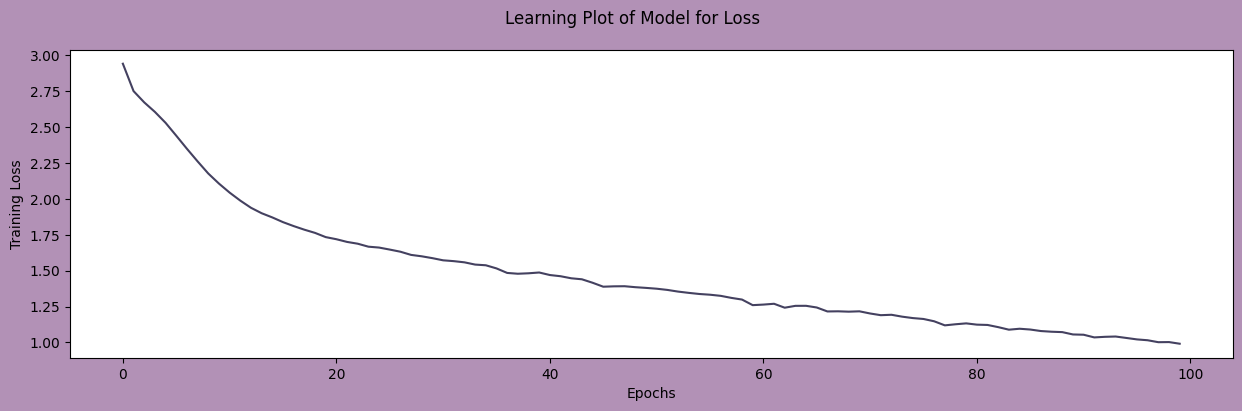

In [ ]:
history_df = pd.DataFrame(history.history)
#Plotting the learnings

fig = plt.figure(figsize=(15,4), facecolor="#B291B6")
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=history_df["loss"],color="#444160")
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")

In [ ]:
import numpy as np

# Assume 'mapping', 'reverse_mapping', 'model', 'L_symb' are defined in the global scope

def Lyrics_Generator(starter, Ch_count, temperature=0.8):
    generated = starter
    seed = [mapping[char] for char in starter]

    for i in range(Ch_count):
        seed_pad = seed[-40:]    # Taking the last 40 characters
        x_pred = np.reshape(seed_pad, (1, len(seed_pad), 1))
        x_pred = x_pred / float(L_symb)

        #print("Seed pad shape:", x_pred.shape)
        prediction = model.predict(x_pred, verbose=0)[0]
        prediction = np.asarray(prediction).astype('float64')

        # Apply temperature to the prediction probabilities
        prediction = np.log(prediction) / temperature
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)

        # Randomly select the next character based on the adjusted probabilities
        probas = np.random.multinomial(1, prediction, 1)
        index = np.argmax(prediction)
        next_char = reverse_mapping[index]

        # Generating new text
        generated += next_char
        seed.append(index)

    return generated


In [ ]:
#Generating a song from the model
song_1 = Lyrics_Generator("main chala akele raston pe, tanha manzil hai kahan", 400)
#Let's have a look at the song
print(song_1)

main chala akele raston pe, tanha manzil hai kahan danain tera bana hain hai tu hai bhanke laayega sabar change aal sahe kaade baalgi kaali hain bale aale sagame khala hakeakau danahoraat charkahal tha dhanka aa bhaudk bhiori baithigarihhere shakar dhakhaa chananadane naadu aasiararii nunugulu kndukuttu paahutin anayam uaaruuahan vaaruu theeyayayanaarayam nratti punch’uaaranga sanaaadithamu tanutu meevum sankekannatenninanne oaanutantholi panasin


In [ ]:
import textwrap

def Lyrics_Generator(starter, Ch_count, temperature=1.0):
    generated = starter
    seed = [mapping[char] for char in starter]

    for i in range(Ch_count):
        seed_pad = seed[-40:]    # Taking the last 40 characters
        x_pred = np.reshape(seed_pad, (1, len(seed_pad), 1))
        x_pred = x_pred / float(L_symb)

        prediction = model.predict(x_pred, verbose=0)[0]
        prediction = np.asarray(prediction).astype('float64')

        # Apply temperature to the prediction probabilities
        prediction = np.log(prediction) / temperature
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)

        # Randomly select the next character based on the adjusted probabilities
        probas = np.random.multinomial(1, prediction, 1)
        index = np.argmax(prediction)
        next_char = reverse_mapping[index]

        # Generating new text
        generated += next_char
        seed.append(index)

    # Break the generated text into lines with maximum 10 words per line
    generated_lines = textwrap.wrap(generated, width=10)

    return '\n'.join(generated_lines)

# Generate a song with line breaks for readability
song_1 = Lyrics_Generator("main chala akele raston pe, tanha manzil hai kahan", 400)
print(song_1)


main chala
akele
raston pe,
tanha
manzil hai
kahan
danain
tera bana
hain hai
tu hai
bhanke
laayega
sabar
change aal
sahe kaade
baalgi
kaali hain
bale aale
sagame
khala
hakeakau
danahoraat
charkahal
tha dhanka
aa bhaudk
bhiori bai
thigarihhe
re shakar
dhakhaa ch
ananadane
naadu
aasiararii
nunugulu
kndukuttu
paahutin
anayam
uaaruuahan
vaaruu the
eyayayanaa
rayam
nratti pun
ch’uaarang
a sanaaadi
thamu
tanutu
meevum san
kekannaten
ninanne oa
anutanthol
i panasin


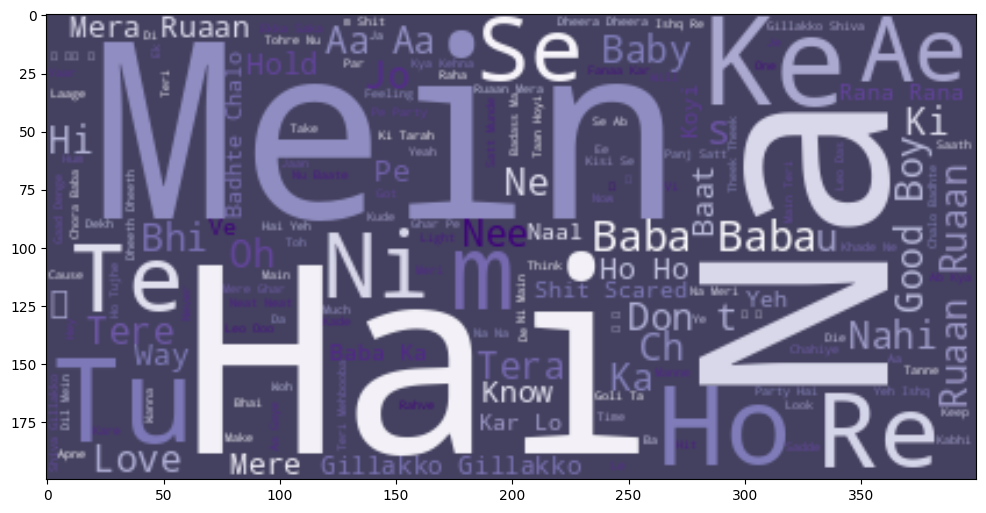

In [ ]:
# Generate a word cloud image
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="#444160",colormap="Purples", max_words=800).generate(" ".join(data["Lyrics"]))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()